In [2]:
library(dendextend)
library(corrplot)


Warning message:
"package 'dendextend' was built under R version 3.4.2"
---------------------
Welcome to dendextend version 1.5.2
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------


Attaching package: 'dendextend'

The following object is masked from 'package:stats':

    cutree



In [4]:
animals <- cluster::animals
animals

war fly ver end gro hai
ant 1   1   1    1   2  1  
bee 1   2   1    1   2  2  
cat 2   1   2    1   1  2  
cpl 1   1   1    1   1  2  
chi 2   1   2    2   2  2  
cow 2   1   2    1   2  2  
duc 2   2   2    1   2  1  
eag 2   2   2    2   1  1  
ele 2   1   2    2   2  1  
fly 1   2   1    1   1  1  
fro 1   1   2    2  NA  1  
her 1   1   2    1   2  1  
lio 2   1   2   NA   2  2  
liz 1   1   2    1   1  1  
lob 1   1   1    1  NA  1  
man 2   1   2    2   2  2  
rab 2   1   2    1   2  2  
sal 1   1   2    1  NA  1  
spi 1   1   1   NA   1  2  
wha 2   1   2    2   2  1

In [5]:
colnames(animals) <- c("warm-blooded", 
                       "can fly",
                       "vertebrate",
                       "endangered",
                       "live in groups",
                       "have hair")
animals

warm-blooded can fly vertebrate endangered live in groups have hair
ant 1            1       1           1          2             1        
bee 1            2       1           1          2             2        
cat 2            1       2           1          1             2        
cpl 1            1       1           1          1             2        
chi 2            1       2           2          2             2        
cow 2            1       2           1          2             2        
duc 2            2       2           1          2             1        
eag 2            2       2           2          1             1        
ele 2            1       2           2          2             1        
fly 1            2       1           1          1             1        
fro 1            1       2           2         NA             1        
her 1            1       2           1          2             1        
lio 2            1       2          NA          2             2        
liz 1            1       2           1          1             1        
lob 1            1       1           1         NA             1        
man 2            1       2           2          2             2        
rab 2            1       2           1          2             2        
sal 1            1       2           1         NA             1        
spi 1            1       1          NA          1             2        
wha 2            1       2           2          2             1

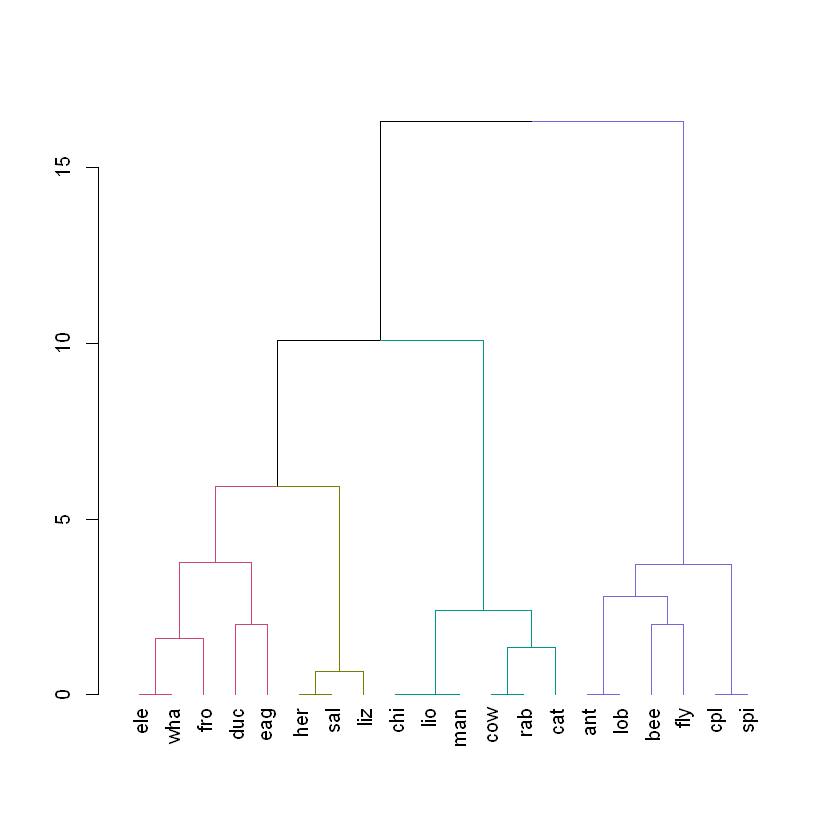

In [8]:
dend_r <- animals %>% dist(method = "man") %>% hclust(method = "ward.D") %>% as.dendrogram %>% ladderize %>%
    color_branches(k=4)
plot(dend_r)

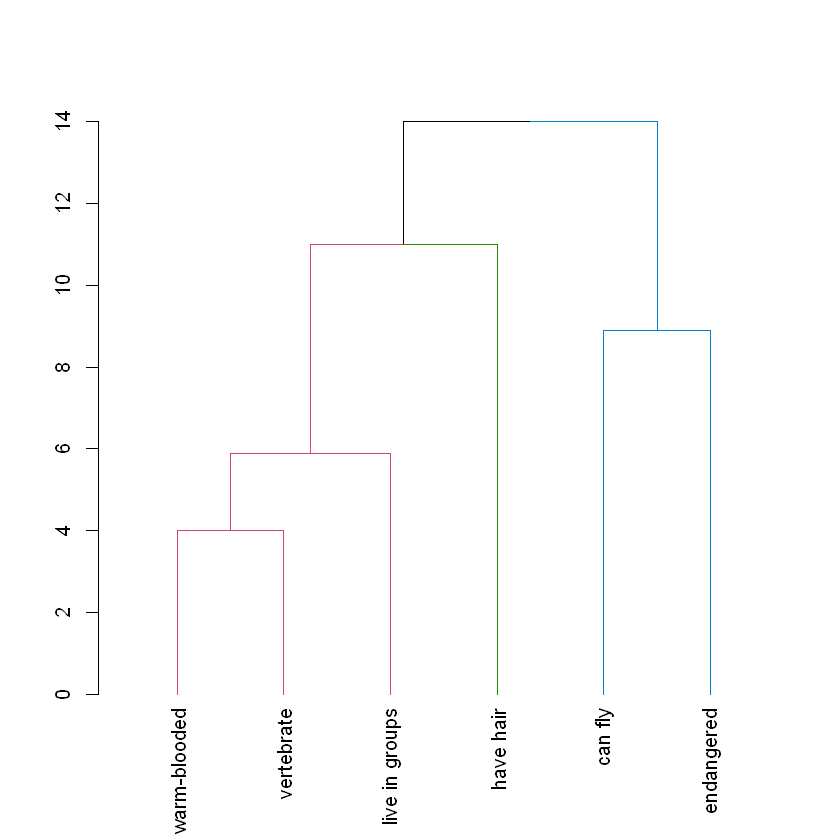

In [9]:
dend_c <- t(animals) %>% dist(method = "man") %>% hclust(method = "com") %>% as.dendrogram %>% ladderize%>%
    color_branches(k=3)
plot(dend_c)

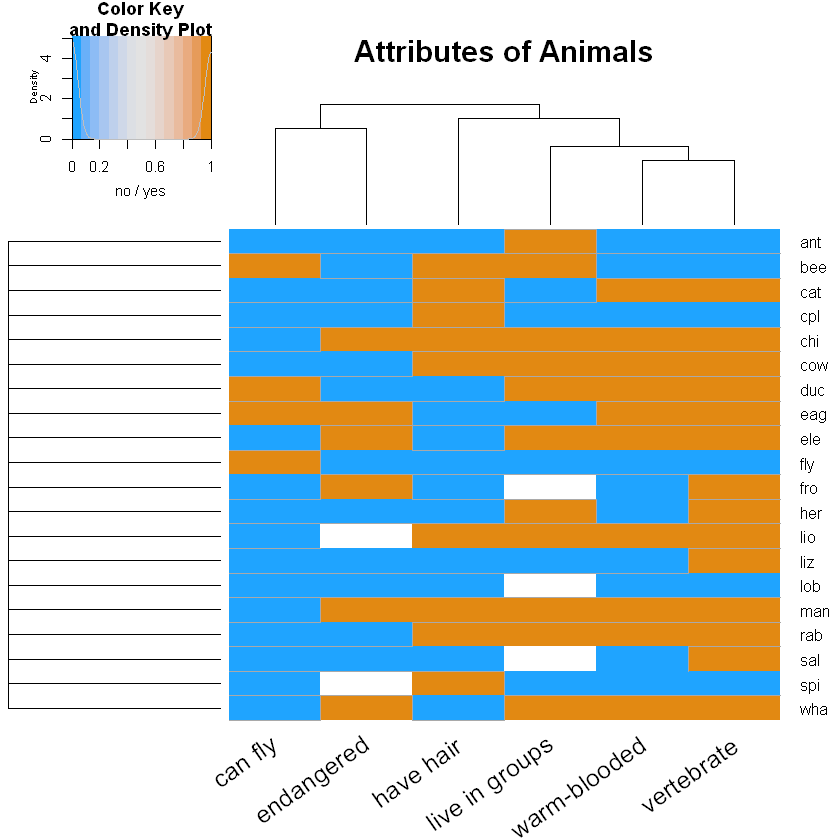

In [14]:
some_col_func <- function(n) (colorspace::diverge_hcl(n, h = c(246, 40), c = 96, l = c(65, 90)))
gplots::heatmap.2(as.matrix(animals-1), 
          main = "Attributes of Animals",
          srtCol = 35,
          Rowv = animals,
          Colv = t(animals),
          trace="row", hline = NA, tracecol = "darkgrey",         
          margins =c(6,3),      
          key.xlab = "no / yes",
          denscol = "grey",
          density.info = "density",
          col = some_col_func
         )


In [16]:

hclust_methods <- c("ward.D", "single", "complete", "average", "mcquitty", 
        "median", "centroid", "ward.D2")
animals_dendlist <- dendlist()
animals_dendlist

list()
attr(,"class")
[1] "dendlist"

In [18]:
for(i in seq_along(hclust_methods)) {
   tmp_dend <-  animals %>% dist(method = "man") %>% 
      hclust(method = hclust_methods[i]) %>% as.dendrogram 
   animals_dendlist <- dendlist(animals_dendlist, tmp_dend)
}

names(animals_dendlist) <- hclust_methods

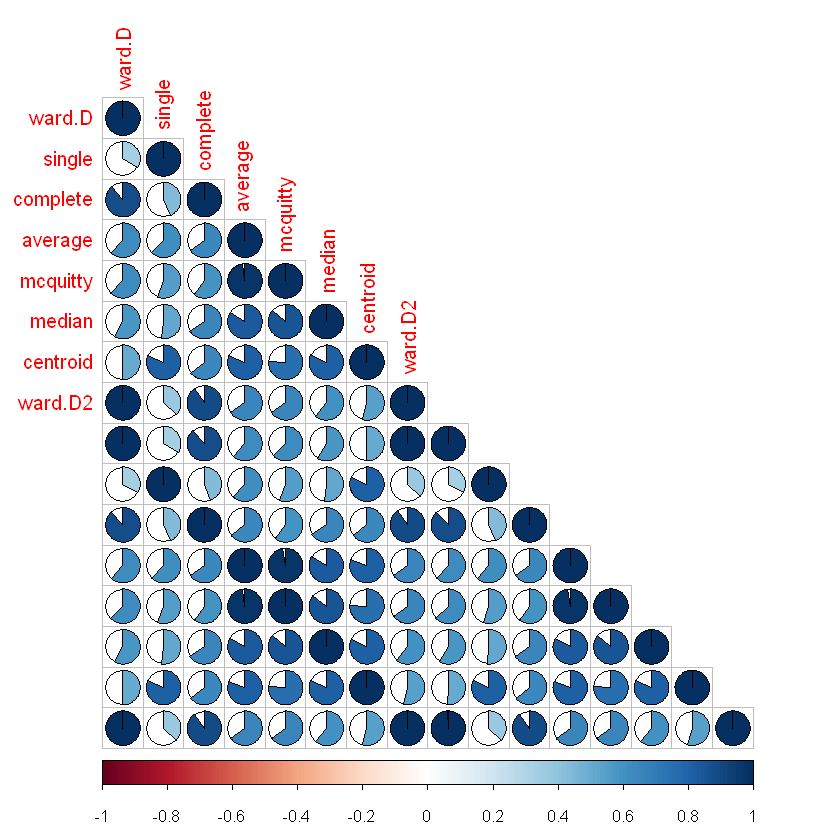

In [19]:
cophenetic_cors <- cor.dendlist(animals_dendlist)
corrplot::corrplot(cophenetic_cors, "pie", "lower")

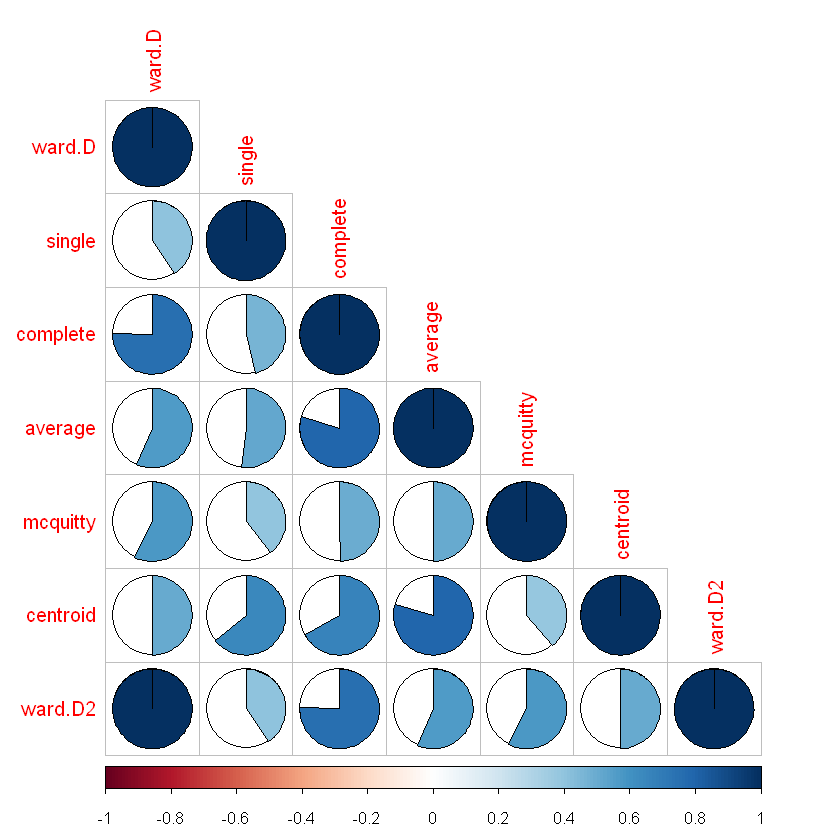

In [20]:
remove_median <- dendlist(animals_dendlist, which = c(1:8)[-6] )
FM_cors <- cor.dendlist(remove_median, method = "FM_index", k = 4)
corrplot::corrplot(FM_cors, "pie", "lower")